In [1]:
from tensorflow.keras.models import load_model
model = load_model("mymodel.keras")

C:\Users\HomePC\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


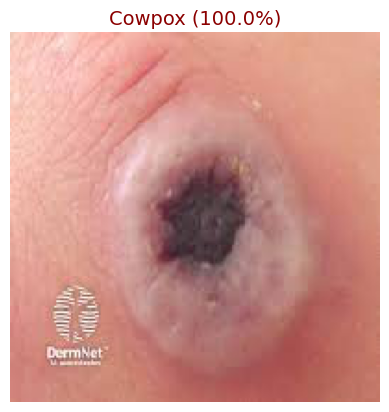

In [16]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Define class names
class_names = ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis-like lesions',
               'Chickenpox', 'Cowpox', 'Dermatofibroma', 'HFMD', 'Healthy', 'Measles',
               'Melanocytic nevi', 'Melanoma', 'Monkeypox', 'Squamous cell carcinoma',
               'Vascular lesions']

# Define image path and model (ensure your model is loaded before calling this)
img_path = 'cowpox.jpeg'

def predict_skin_lesion(image_path, model, class_names, img_size=(200, 200, 3)):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=img_size[:2])
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make prediction
    pred = model.predict(img_array)
    class_index = np.argmax(pred)
    confidence = np.max(pred)
    predicted_class = class_names[class_index]

    # Display image with prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{predicted_class} ({confidence * 100:.1f}%)", fontsize=14, color='darkred')
    plt.show()

    return predicted_class, confidence

# Run the function
label, conf = predict_skin_lesion(img_path, model, class_names)